In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/imhardikj/Universities-Clustering/master/College_Data",na_values="?")

In [30]:
data.head(26)

,university,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   university   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad_Rate    777 non-null    int64  
dtypes: float

In [5]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [6]:
data.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [23]:
data.columns = data.columns.str.replace('Unnamed: 0', 'university')
data.columns = data.columns.str.replace ('Grad.Rate','Grad_Rate')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_5292/1014446879.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace ('Grad.Rate','Grad_Rate')


In [14]:
column = data["Grad.Rate"]
max_value=column.max()


In [16]:
print(max_value)

118


In [18]:
column = data["PhD"]
max_value=column.max()
print(max_value)

103


In [19]:
column = data["university"]
max_value=column.max()
print(max_value)

York College of Pennsylvania


In [27]:
data.university[data.Grad_Rate==data.Grad_Rate.max()]

95    Cazenovia College
Name: university, dtype: object

In [28]:
data.Grad_Rate=data.Grad_Rate.replace(data.Grad_Rate.max(),100)

In [29]:
data.Grad_Rate.max()

100

In [57]:
X=data.drop(['university','Private'],axis=1)

<h1>Clustering-distance bw two points<h2>

In [41]:
from sklearn.preprocessing import normalize

In [72]:
X1=normalize(row)

In [73]:
import scipy.cluster.hierarchy as shc

In [74]:
link=shc.linkage(X1)

In [75]:
row = data.iloc[:10]

In [76]:
row=row.drop(['university','Private'],axis=1)


In [77]:
print(row)

   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   
5   587     479     158         38         62          678           41   
6   353     340     103         17         45          416          230   
7  1899    1720     489         37         68         1594           32   
8  1038     839     227         30         63          973          306   
9   582     498     172         21         44          799           78   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750    

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [55.0, 55.0, 80.0, 80.0],
  [45.0, 45.0, 67.5, 67.5],
  [35.0, 35.0, 56.25, 56.25],
  [25.0, 25.0, 45.625, 45.625],
  [10.0, 10.0, 35.3125, 35.3125]],
 'dcoord': [[0.0, 0.12086278215441965, 0.12086278215441965, 0.0],
  [0.0, 0.04508128413722419, 0.04508128413722419, 0.0],
  [0.0, 0.05113213357563551, 0.05113213357563551, 0.0],
  [0.04508128413722419,
   0.09022784273099921,
   0.09022784273099921,
   0.05113213357563551],
  [0.0, 0.09988149460125453, 0.09988149460125453, 0.09022784273099921],
  [0.0, 0.15160141290228824, 0.15160141290228824, 0.09988149460125453],
  [0.0, 0.15782475575373076, 0.15782475575373076, 0.15160141290228824],
  [0.0, 0.17622749126367518, 0.17622749126367518, 0.15782475575373076],
  [0.12086278215441965,
   0.2628289165315877,
   0.2628289165315877,
   0.17622749126367518]],
 'ivl': ['3', '4', '0', '1', '6', '9', '5', '8', '2', '7'],
 'leaves

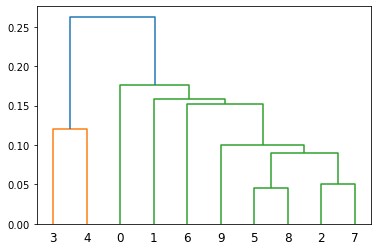

In [79]:
shc.dendrogram(link)

<h1>Create a cluster<h2>

In [80]:
from sklearn.cluster import AgglomerativeClustering

In [81]:
clustering=AgglomerativeClustering(n_clusters=3).fit(link)

In [84]:
C=clustering.labels_

In [85]:
t= pd.DataFrame(C)

In [86]:
b=data.university[:11]

In [87]:
data=pd.concat([b,t,X],axis=1)

In [88]:
data.rename(columns={0:"cluster"},inplace=True)

In [89]:
data.head(10)

,university,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad_Rate
0,Abilene Christian University,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,0.0,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,2.0,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,2.0,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,0.0,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,NaN,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [91]:
data.to_excel("C:/sush/college.xlsx") 

In [92]:
data.to_csv("C:/sush/college.csv")